In [1]:
"Importamos"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/BelenLMO/Machine-Learning-IA/K-vecinos/vehiculos.csv'

# Cargar el archivo CSV en un DataFrame
dataframe= pd.read_csv(url)

In [5]:
"visualiza"
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [6]:
dataframe.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance_major_axis', 'scaled_variance_minor_axis',
       'scaled_radius_gyration', 'skewness_major_axis', 'skewness_minor_axis',
       'kurtosis_minor_axis', 'kurtosis_major_axis', 'hollows_ratio',
       'vehicle_class'],
      dtype='object')

In [7]:
"Saber que tipos de vehiculos tienen los datos"
"nos devuelve una lista 4 elementos"

dataframe[ 'vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [8]:
"Variable objetivo a predecir sera el tipo de vehiculo"
"Variable X las caracteristicas, todo el dataframe excepto esa columna"

y=dataframe[ 'vehicle_class']
X=dataframe.drop([ 'vehicle_class'], axis=1)

Importamos para dividir el set de datos en datos de entrenamiento y prueba

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=45)

# Entrenamiento del modelo

In [14]:
from sklearn.neighbors import KNeighborsClassifier

"Variable en la que pasamos como parametros el Neighbors, es decir la kvecinos. En principio ponemos 1"
knn=KNeighborsClassifier(n_neighbors=1)

Entrenamos el modelo

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Realizamos las predicciones

In [17]:
predicciones=knn.predict(X_test)

In [18]:
"Estas serian las predicciones"

predicciones

array(['saab', 'opel', 'saab', 'opel', 'saab', 'van', 'saab', 'opel',
       'saab', 'van', 'opel', 'bus', 'van', 'opel', 'opel', 'van', 'opel',
       'saab', 'bus', 'saab', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus',
       'opel', 'saab', 'van', 'bus', 'opel', 'opel', 'bus', 'saab',
       'opel', 'bus', 'van', 'bus', 'bus', 'van', 'van', 'opel', 'opel',
       'bus', 'saab', 'van', 'bus', 'bus', 'opel', 'bus', 'bus', 'saab',
       'opel', 'van', 'bus', 'saab', 'saab', 'bus', 'saab', 'opel', 'van',
       'van', 'bus', 'bus', 'saab', 'van', 'bus', 'bus', 'van', 'saab',
       'van', 'bus', 'opel', 'van', 'opel', 'van', 'saab', 'saab', 'bus',
       'bus', 'van', 'saab', 'saab', 'van', 'bus', 'bus', 'saab', 'saab',
       'saab', 'van', 'van', 'van', 'van', 'saab', 'saab', 'saab', 'saab',
       'opel', 'opel', 'saab', 'bus', 'bus', 'bus', 'saab', 'van', 'bus',
       'saab', 'saab', 'saab', 'bus', 'van', 'bus', 'opel', 'bus', 'saab',
       'saab', 'opel', 'van', 'opel', 'opel', 'bus

In [19]:
"Estos eran los resultados de las pruebas de test"
y_test

547     bus
694    saab
559    saab
248    opel
720    opel
       ... 
481    opel
436     van
735    opel
63      bus
216    saab
Name: vehicle_class, Length: 254, dtype: object

# Evaluacion

Para evaluar si son correctas las predicciones en relacion con los datos reales de las prubas de test, usaremos metodas de evaluacion, como la Matriz de confusión y la Precision del modelo

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [21]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



Pusimos k=1, vamos a hacer un sistema para evaluar que k es mas optimo para obtener una precision mayor

Hacemos un bucle hasta x ejemplo 30 (poner el valor que se quiera), recorreremos el bucle con k=1, k=2, ...,k=30, entrenamos el modelo con ese k, hacemos las predicciones con ese k y añadimos en el array la tasa de error de cada k. La tasa de error mas baja sera la que cojamos para el modelo.

In [38]:
tasa_error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediccion_i=knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i !=y_test))


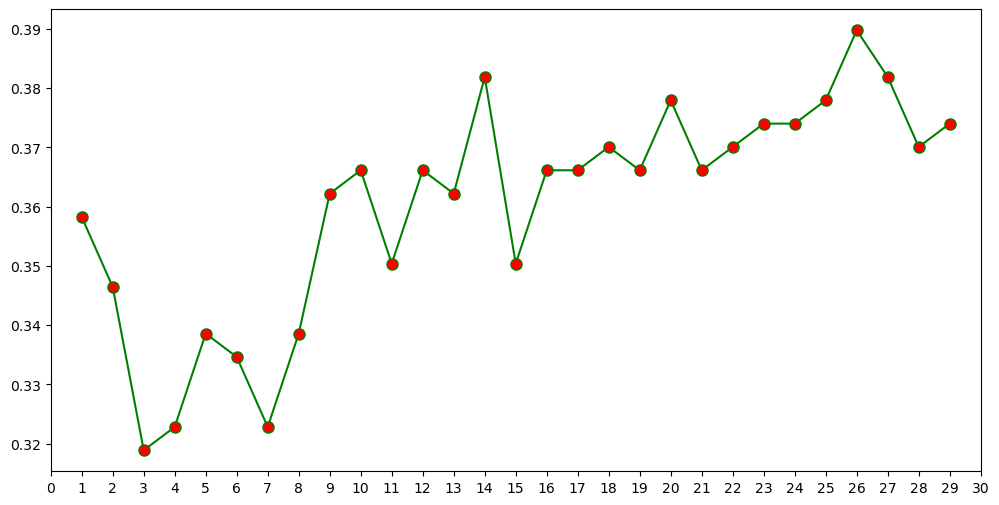

In [39]:
"Mostramos los valores en un grafico"
"Hacemos el grafico mas grande para que sea visible el minimo"

plt.figure(figsize=(12, 6))

valores=range(1,30)

"creamos el grafico y el eje x muestra valores "

plt.plot(valores, tasa_error, color='green',marker='o', markerfacecolor='red', markersize=8)
plt.xlim(0, 30) 
plt.xticks(range(0, 31, 1))  # Configura los valores del eje y de 1 en 1 hasta 30
plt.show()

Viendo que k=3 es tasa mas pequeña de error, volvemos al modelo con esa K

In [35]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predicciones=knn.predict(X_test)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254



# FIN